# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key
#!pip install citipy
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from datetime import date

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
today= date.today()

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:

from tkinter import UNITS


url = "http://api.openweathermap.org/data/2.5/weather?" 
units="metric"
query_url=query_url = f"{url}appid={weather_api_key}&units={units}&q="
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_temp=city_weather["main"]["temp"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | karmala
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | hopatcong
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ploemeur
Processing Record 12 of Set 1 | salvador
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | cangucu
Processing Record 15 of Set 1 | centralia
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | burgos
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | jamestown
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data_df=pd.DataFrame(city_data)

In [7]:
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,8.04,97,42,1.48,NZ,1663156011
1,arraial do cabo,-22.9661,-42.0278,22.98,88,40,5.66,BR,1663155793
2,karmala,18.4167,75.2000,26.09,72,99,8.39,IN,1663155889
3,kruisfontein,-34.0033,24.7314,29.03,18,0,5.22,ZA,1663156012
4,saldanha,-33.0117,17.9442,18.06,57,0,6.17,ZA,1663156012
5,hermanus,-34.4187,19.2345,27.11,54,0,2.50,ZA,1663156013
6,hopatcong,40.9329,-74.6593,15.43,84,0,0.89,US,1663155856
7,rikitea,-23.1203,-134.9692,21.17,80,100,6.37,PF,1663156014
8,ploemeur,47.7333,-3.4333,23.68,90,100,3.60,FR,1663156015
9,salvador,13.8333,-88.9167,20.03,98,100,0.83,SV,1663156016


In [8]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        564 non-null    object 
 1   Lat         564 non-null    float64
 2   Lng         564 non-null    float64
 3   Max Temp    564 non-null    float64
 4   Humidity    564 non-null    int64  
 5   Cloudiness  564 non-null    int64  
 6   Wind Speed  564 non-null    float64
 7   Country     564 non-null    object 
 8   Date        564 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.8+ KB


In [9]:
city_data_df.to_csv("cityweather_Output.csv",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.


high_humidity_data = city_data_df[(city_data_df["Humidity"] > 100)].index
                                  
high_humidity_data

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
clean_city_data = city_data_df.drop(high_humidity_data, inplace=False)
clean_city_data.head(20)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,8.04,97,42,1.48,NZ,1663156011
1,arraial do cabo,-22.9661,-42.0278,22.98,88,40,5.66,BR,1663155793
2,karmala,18.4167,75.2000,26.09,72,99,8.39,IN,1663155889
3,kruisfontein,-34.0033,24.7314,29.03,18,0,5.22,ZA,1663156012
4,saldanha,-33.0117,17.9442,18.06,57,0,6.17,ZA,1663156012
5,hermanus,-34.4187,19.2345,27.11,54,0,2.50,ZA,1663156013
6,hopatcong,40.9329,-74.6593,15.43,84,0,0.89,US,1663155856
7,rikitea,-23.1203,-134.9692,21.17,80,100,6.37,PF,1663156014
8,ploemeur,47.7333,-3.4333,23.68,90,100,3.60,FR,1663156015
9,salvador,13.8333,-88.9167,20.03,98,100,0.83,SV,1663156016


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot shows as latitude increases , the temperature falls and vice versa.


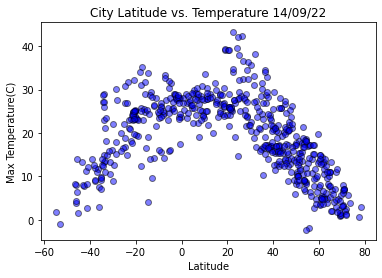

In [42]:

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolors="blue", edgecolors="black", alpha = 0.5)


plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Latitude vs. Temperature " + today.strftime("%d/%m/%y"))
plt.savefig('citytemp.png')
print("The plot shows as latitude increases , the temperature falls and vice versa.")


## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity.


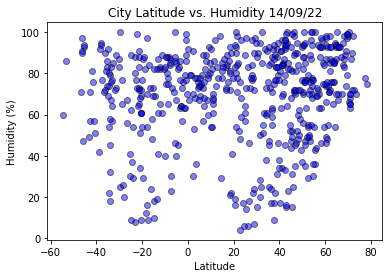

In [43]:

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity " + today.strftime("%d/%m/%y"))
plt.savefig('cityhumidity.png')
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity.")

## Latitude vs. Cloudiness Plot

The plot suggests that latitude does not cause an area to be more cloudy or less cloudy. Hance, there is no direct relationship betweeen latitude and cloudiness.


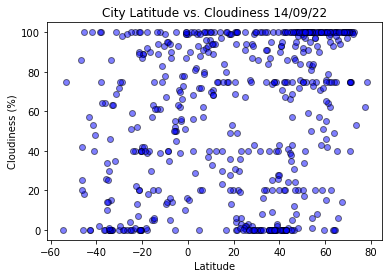

In [44]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness " + today.strftime("%d/%m/%y"))
plt.savefig('citycloudiness.png')
print("The plot suggests that latitude does not cause an area to be more cloudy or less cloudy. Hance, there is no direct relationship betweeen latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

The plot seems to prove out that the latitude will not impact the wind speed.


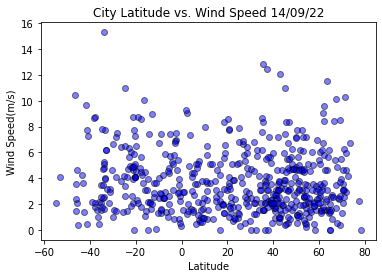

In [45]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs. Wind Speed " + today.strftime("%d/%m/%y"))
plt.savefig('citywindspeed.png')
print("The plot seems to prove out that the latitude will not impact the wind speed.")

## Linear Regression

In [46]:
nor_hemisphere_data = city_data_df.loc[city_data_df["Lat"] > 0,:]
nor_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,karmala,18.4167,75.2000,26.09,72,99,8.39,IN,1663155889
6,hopatcong,40.9329,-74.6593,15.43,84,0,0.89,US,1663155856
8,ploemeur,47.7333,-3.4333,23.68,90,100,3.60,FR,1663156015
9,salvador,13.8333,-88.9167,20.03,98,100,0.83,SV,1663156016
10,haines junction,60.7522,-137.5108,4.97,93,100,1.54,CA,1663156017
...,...,...,...,...,...,...,...,...,...
559,komsomolskiy,40.4272,71.7189,29.40,17,0,2.06,UZ,1663156364
560,kalang,5.9197,121.3631,27.74,75,72,3.56,PH,1663156364
561,cancun,21.1743,-86.8466,25.59,100,94,3.17,MX,1663156364
562,kampot,10.6167,104.1833,25.03,82,33,3.77,KH,1663156365


In [25]:
sou_hemisphere_data = city_data_df.loc[city_data_df["Lat"] < 0,:]
sou_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,8.04,97,42,1.48,NZ,1663156011
1,arraial do cabo,-22.9661,-42.0278,22.98,88,40,5.66,BR,1663155793
3,kruisfontein,-34.0033,24.7314,29.03,18,0,5.22,ZA,1663156012
4,saldanha,-33.0117,17.9442,18.06,57,0,6.17,ZA,1663156012
5,hermanus,-34.4187,19.2345,27.11,54,0,2.50,ZA,1663156013
...,...,...,...,...,...,...,...,...,...
537,mount isa,-20.7333,139.5000,19.87,34,0,0.00,AU,1663156350
539,sainte-marie,-20.8968,55.5496,25.09,68,100,7.72,RE,1663156351
540,chicama,-7.8447,-79.1469,14.30,85,94,2.45,PE,1663156351
549,waipawa,-41.4122,175.5153,2.76,76,53,0.42,NZ,1663156357


###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6507659945457087


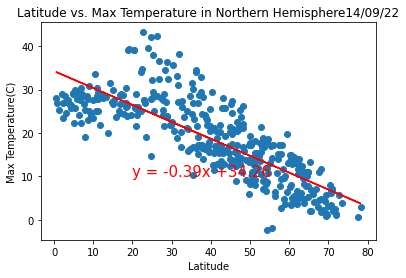

In [40]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title(f'Latitude vs. Max Temperature in Northern Hemisphere' + today.strftime("%d/%m/%y"))
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('maxtem_northern.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.47038356569636003


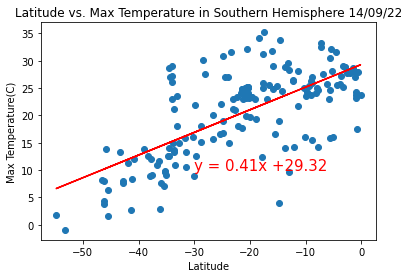

In [41]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('Latitude vs. Max Temperature in Southern Hemisphere ' + today.strftime("%d/%m/%y"))
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('maxtem_southern.png')
plt.show()


In [25]:
print(f"As it is shown in the plots above, there is a positive correlation between the latitude and\
the max temperation in those random cities we analised. So the max temperaturs increases as the \
latitude increases in the northern Hemisphere and Southern Hemisphere")

As it is shown in the plots above, there is a positive correlation between the latitude andthe max temperation in those random cities we analised. So the max temperaturs increases as the latitude increases in the northern Hemisphere and Southern Hemisphere


### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.016291807289205384


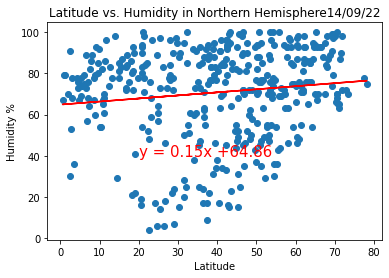

In [29]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Humidity %')
plt.title('Latitude vs. Humidity in Northern Hemisphere' + today.strftime("%d/%m/%y"))
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig('humidity_northern.png')

# Show plot

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00018261809018075615


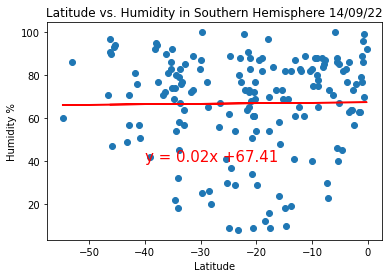

In [30]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Humidity %')
plt.title('Latitude vs. Humidity in Southern Hemisphere ' + today.strftime("%d/%m/%y"))
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig('humidity_southern.png')
# Show plot

plt.show()

In [54]:
print("As it is shown in the two plots, we could not predict the humidity\
according to the latitude either in Northern hemisphere or in Southern Hemisphere")

As it is shown in the two plots, we could not predict the humidityaccording to the latitude either in Northern hemisphere or in Southern Hemisphere


### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.033816959950805046


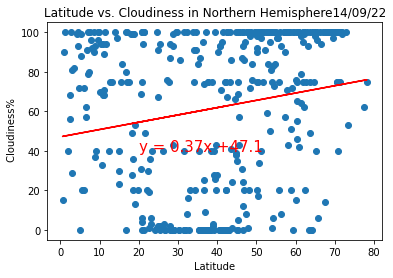

In [31]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f' Cloudiness%')
plt.title('Latitude vs. Cloudiness in Northern Hemisphere' + today.strftime("%d/%m/%y"))
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig('cloudiness_northern.png')

# Show plot

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08335563223585617


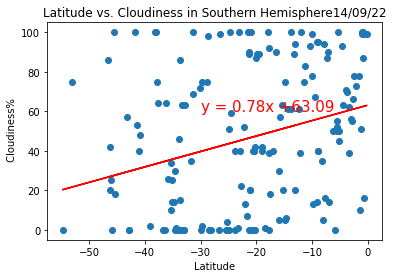

In [32]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f' Cloudiness(%)')
plt.title('Latitude vs Cloudiness in Southern Hemisphere' + today.strftime("%d/%m/%y"))
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig('cloudiness_southern.png')

# Show plot

plt.show()

In [33]:
print("There is a no obivous relation between latitude and cloudiness as you can see in the plots.  ")

There is a no obivous relation between latitude and cloudiness as you can see in the plots.  


### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.002013000144743554


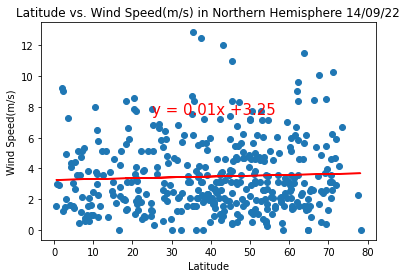

In [48]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed(m/s)')
plt.title('Latitude vs. Wind Speed in Northern Hemisphere ' + today.strftime("%d/%m/%y"))
plt.annotate(line_eq,(25,7.5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig('wind_northern.png')
# Show plot

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0046950767514626675


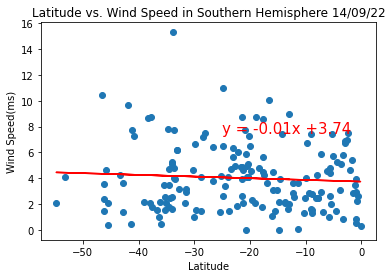

In [50]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed(ms)')
plt.title('Latitude vs. Wind Speed in Southern Hemisphere ' + today.strftime("%d/%m/%y"))
plt.annotate(line_eq,(-25,7.5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig('wind_southern.png')

# Show plot

plt.show()

In [34]:
print("From the plots, we could conclude that latitude does not play an impact on the wind speed.")

From the plots, we could conclude that latitude does not play an impact on the wind speed.
